In [3]:
import pandas as pd
import datajoint as dj
dj.config['database.host'] = '10.86.1.219'
dj.config['database.user'] = 'root'
dj.config['database.password'] = 'retina'
dj.config["enable_python_native_blobs"] = True # Only for testing in dj0.12 (https://github.com/datajoint/datajoint-python#python-native-blobs)

%env DJ_SUPPORT_FILEPATH_MANAGEMENT=TRUE

import main
drive_path = r"\\NERFHF01/djnerf1/VEIDB/"
# data_path = r"Y:\Data"
data_path =r"Z:\Data/"
ft = main.load(drive_path, data_path)

env: DJ_SUPPORT_FILEPATH_MANAGEMENT=TRUE
Connecting root@10.86.1.219:3306


In [5]:
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
sb.set_style('dark')

['2P', 'SCEphys', 'VEIDB', 'mysql', 'performance_schema', 'sys', 'test']


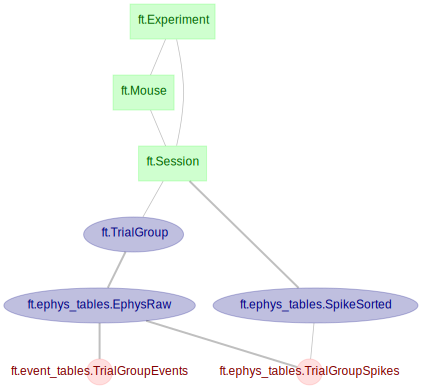

In [7]:
print(dj.list_schemas())
dj.Di(ft.schema)

In [46]:
exp_table = ft.Experiment()
sess_table = ft.Session()
mouse_table = ft.Mouse()
trialgroup_table = ft.TrialGroup()
raw_table = ft.ephys_tables.EphysRaw()
sorted_table = ft.ephys_tables.SpikeSorted()
tg_events_table = ft.event_tables.TrialGroupEvents()
tg_spikes_tables = ft.ephys_tables.TrialGroupSpikes()

In [52]:
key = {'experiment_id': '01437', 'session_id': '20201214b', 'trialgroup_id': 'EXD2_0001'}
clusters, cluster_annot = (tg_spikes_tables & key).fetch1('clusters', 'cluster_annot')
stims_start, stim_triggers = (tg_events_table & key).fetch1('stims_start', 'stim_triggers')

In [53]:
print(len([annot for annot in list(cluster_annot.values()) if annot == 'good']))
print(len(cluster_annot))

229
749


In [54]:
for c in clusters.keys():
    clusters[c] = clusters[c][clusters[c] >= stims_start]
    clusters[c] = clusters[c] - stims_start
stim_triggers = stim_triggers - stims_start

In [55]:
stim_triggers

array([   33403,    33935,    43430,    58936,   104435,   113928,
         129435,   174935,   184429,   199934,   245435,   254929,
         270435,   315511,  7035688,  7036400,  7045894,  7061399,
        7106899,  7116394,  7131891,  7177402,  7186893,  7202393,
        7247898,  7257393,  7272898,  7317994, 13168146, 19018314,
       19018838, 19028331, 19043838, 19089336, 19098832, 19114336,
       19159837, 19169331, 19184837, 19230336, 19239831, 19255336,
       19300412, 26290593, 26290799, 26300294, 26315800, 26361299,
       26370794, 26386299, 26431799, 26441293, 26456799, 26502298,
       26511793, 26527299, 26572376, 32272538, 32272769, 32282263,
       32297769, 32343268, 32352764, 32368268, 32413767, 32423263,
       32438768, 32484271, 32493762, 32509268, 32554345, 37414500,
       37415243, 37424737, 37440242, 37485742, 37495236, 37510737,
       37556241, 37565740, 37581241, 37626740, 37636236, 37651741,
       37696836, 43816989, 50447166, 50447674, 50457178, 50472

229


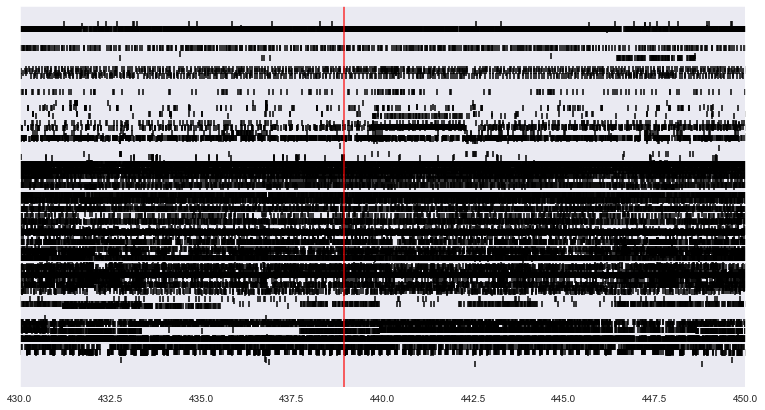

In [72]:
data = []

for c in cluster_annot:
    if cluster_annot[c] == 'good':
        data.append((c, clusters.get(c)))
fig, ax = plt.subplots(figsize=(13, 7))
print(len(data))
for i, (cluster, cl_spike_times) in enumerate(data[:]):
    if cl_spike_times is not None and isinstance(cl_spike_times, np.ndarray):
#         fr, _ = np.histogram(cl_spike_times, bins=np.arange(0, np.array(cl_spike_times)[-1], 30*50))
#         plt.plot(fr*10+cluster)
        ax.scatter(np.array(cl_spike_times)/30000, np.ones_like(cl_spike_times)*cluster*1, marker='|', c='k') # SCATTER PLOT

# ax.axvline(stimgroup_start/30000, ymin=0, ymax=1, c='b', alpha=1)  
for trigger in stim_triggers:
    ax.axvline(trigger/30000, ymin=0, ymax=1, c='r', alpha=0.8) # FOR SCATTER PLOT SET DIVIDOR TO 30000
#     ax.axvline(trigger/(30*50), ymin=0, ymax=1, c='r')

# plt.xlim(2,16)
plt.yticks([])
plt.xlim(430, 450)
# plt.xlabel('time')
# plt.ylabel('neurons')
# plt.savefig('spikes_SC.png', dpi=200)
plt.show()

In [20]:
cluster_annot.values()

dict_values(['mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'good', 'mua', 'good', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'good', 'mua', 'mua', 'mua', 'mua', 'good', 'mua', 'mua', 'mua', 'mua', 'good', 'good', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'good', 'good', 'good', 'good', 'mua', 'good', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'good', 'mua', 'mua', 'good', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'good', 'good', 'good', 'good', 'mua', 'mua', 'good', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'good', 'mua', 'mua', 'mua', 'good', 'mua', 'good', 'good', 'good', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'good', 'good', 'good', 'mua', 'mua', 'good', 'mua', 'good', 'mua', 'mua', 'mua', 'mua', 'good', 'mua', 'good', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'good', 'mua', 'mua', 'mua', 'mua

In [18]:
spike_times.shape

(41432880, 1)

In [5]:
events_table.populate()

Populated a trial for 20201214b in 01437
Error occurred when loading events end. index 0 is out of bounds for axis 0 with size 0
Populated a trial for 20201214b in 01437
Populated a trial for 20201214b in 01437
Error occurred when loading events end. index 0 is out of bounds for axis 0 with size 0
Populated a trial for 20201214b in 01437


In [74]:
exp_table

experiment_id,description,experimenters name of the experimenters
01437,GRP-optotagged,Anna Chrzanowska


In [6]:
events_table

experiment_id,mouse_id,session_id,trialgroup_id,stimulus_type,start_abs,stims_start,stims_end,stim_triggers
01437,M02,20201214b,EXD1_0001,EXD1,0,29996,-1,=BLOB=
01437,M02,20201214b,EXD2_0001,EXD2,63384371,30002,80376363,=BLOB=
01437,M02,20201214b,EXD3_0001,EXD3,144285767,30006,-1,=BLOB=
01437,M02,20201214b,OPTS_0001,OPTS,205696127,29999,280143,=BLOB=


In [14]:
sync_trace = (raw_table & {'session_id': '20201214b', 'stimulus_type': 'EXD1'}).fetch1('sync_trace')

In [15]:
sync_trace.shape

(16, 63384371)

In [16]:
import numpy as np

In [33]:
np.where(sync_trace[0]>0.5)

(array([29996, 29997, 29998, 29999, 30000, 30001, 30002, 30003, 30004,
        30005, 30006, 30007, 30008, 30009, 30010, 30011, 30012, 30013,
        30014, 30015, 30016, 30017, 30018, 30019, 30020, 30021, 30022,
        30023, 30024, 30025, 30026, 30027, 30028, 30029, 30030, 30031,
        30032, 30033, 30034, 30035, 30036, 30037, 30038, 30039, 30040,
        30041, 30042, 30043, 30044, 30045, 30046, 30047, 30048, 30049,
        30050, 30051, 30052, 30053, 30054, 30055], dtype=int64),)

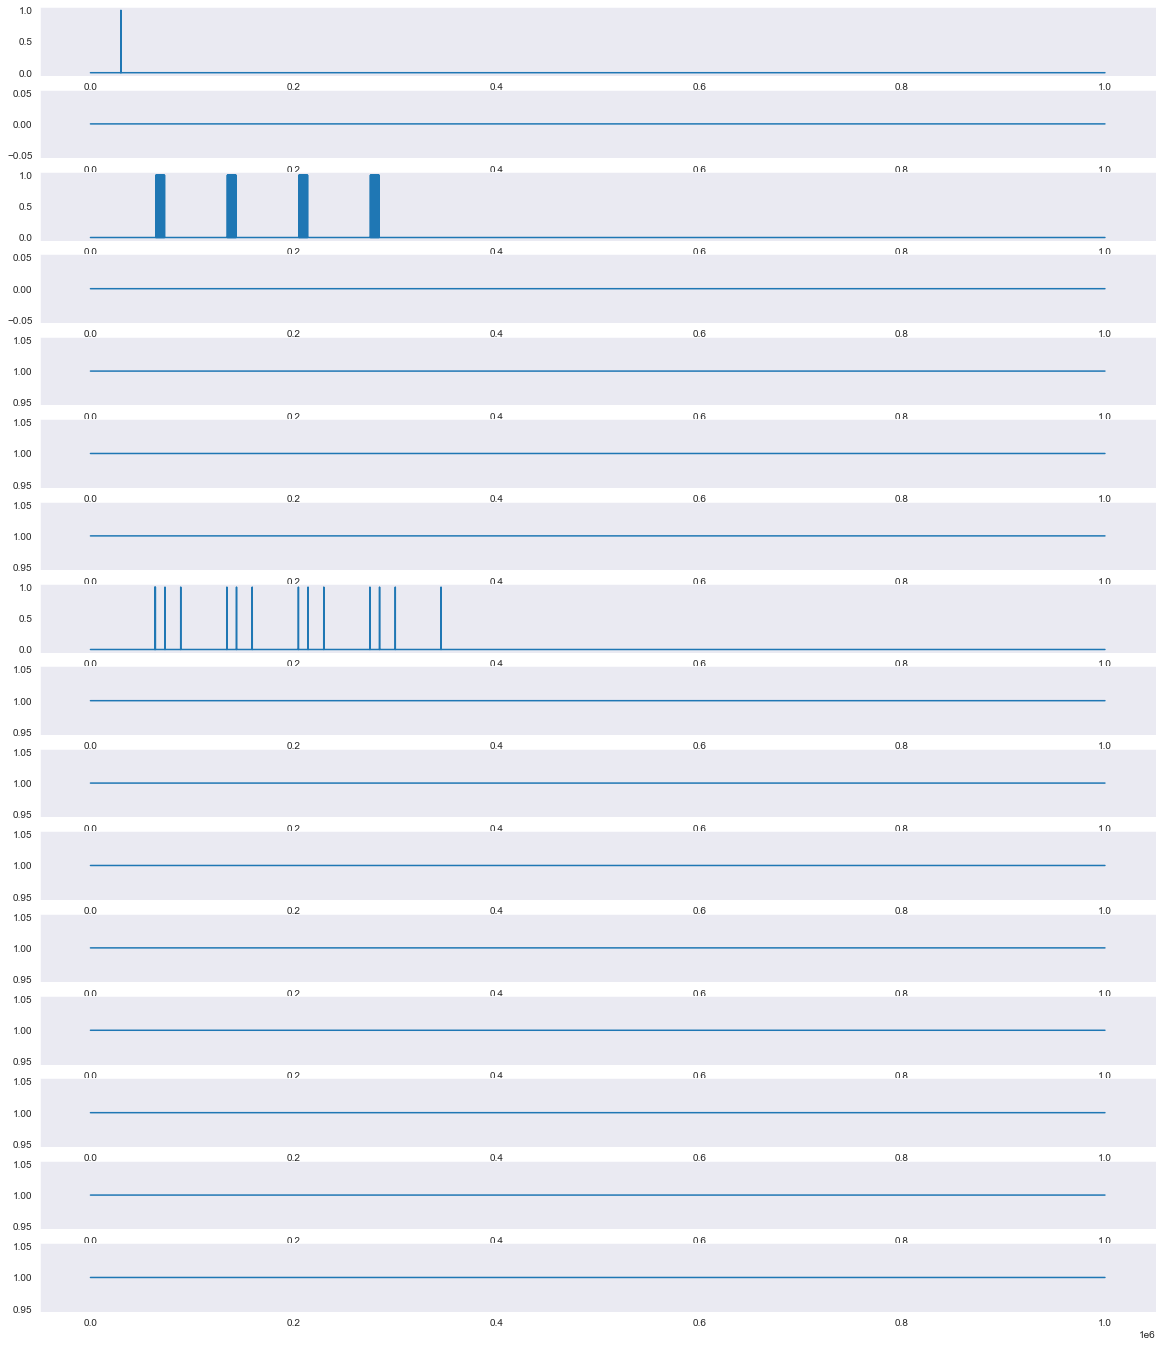

In [16]:
fig, axs = plt.subplots(16, 1, figsize=(20, 24))
for i, signal in enumerate(sync_trace):
    axs[i].plot(signal[:1000000])
plt.show()